Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 03: Morphological Operations¶

## Introduction

This week's sheet should be solved and handed in before the end of **Monday, December 2, 2024**. If you need help (and Google and other resources were not enough) use the StudIP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (complex numbers) [0 Points]

This exercise is supposed to be easy, does not give any points, and is voluntary. There may be similar exercises on future sheets. They are intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look up these concepts (again). You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *complex number*, what is the *complex plane*, how are complex numbers usually denoted?

YOUR ANSWER HERE

**b)** What is the *real* and the *imaginary* part of a complex number? What is the *absolute value* of a complex number? What is the *complex conjugate*?

YOUR ANSWER HERE

**c)** What are polar coordinates? What are their advantages? Can you convert between cartesian and polar coordinates? Can you write down $i=\sqrt{-1}$ in polar coordinates? What about $\sqrt{i}$?

YOUR ANSWER HERE

**d)** Python, and also numpy, support calculations with complex numbers. Consult the documentation to find out details. Notice that $i$ is substituted by $j$ in Python.

In [4]:
import numpy as np
np.exp(1j*np.pi/4)

np.complex128(0.7071067811865476+0.7071067811865475j)

## Assignment 1: Noise and Local Operators (7 points)

In [2]:
import numpy as np
import skimage.data
import imageio.v3 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

## Getting the Original Image

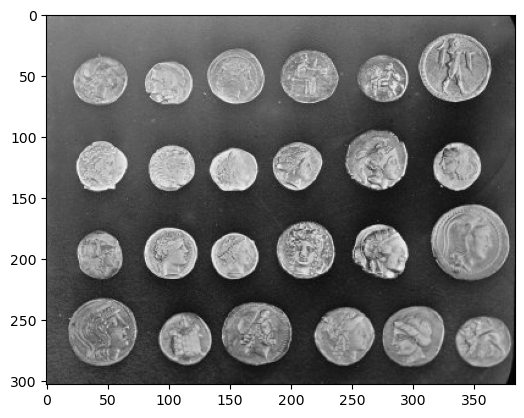

In [ ]:
import matplotlib.pyplot as plt
image = skimage.data.coins().astype(np.float64)
plt.imshow(image, cmap="gray")
plt.show()

### a) Salt and Pepper Noise

Add salt and pepper noise to the image.

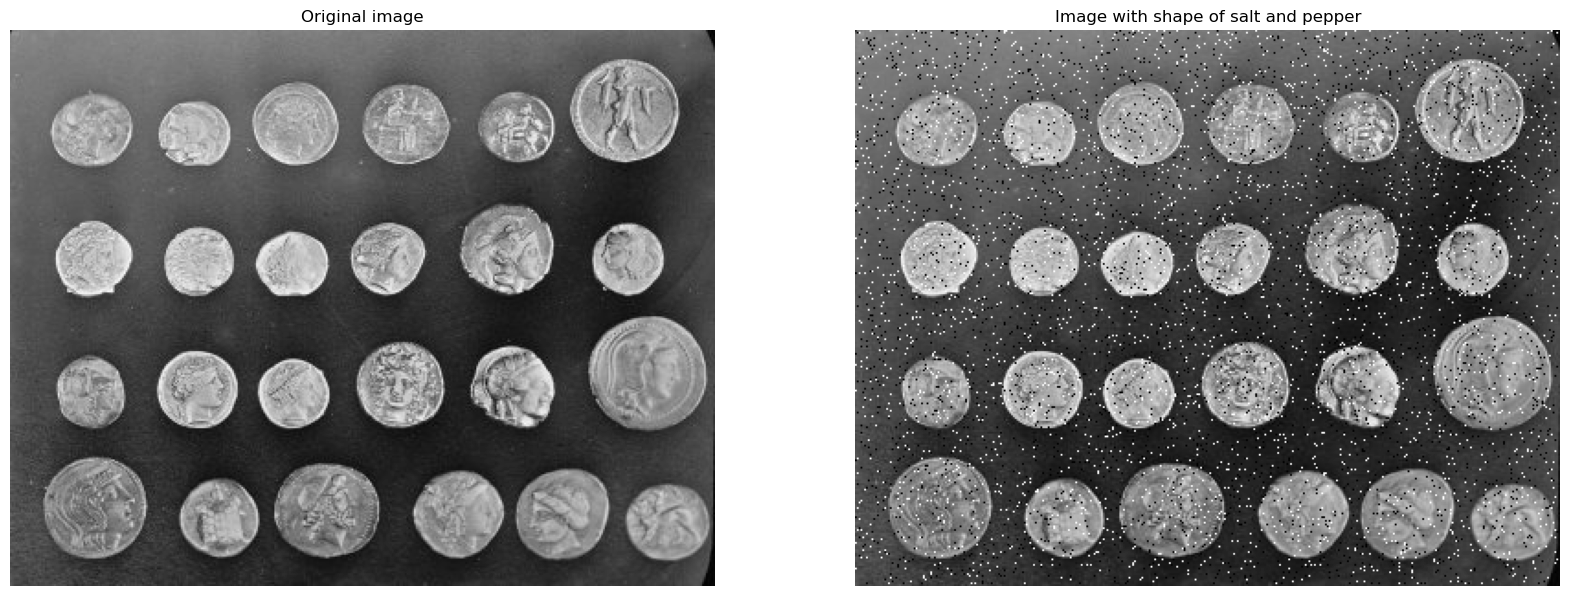

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import coins

image = coins().astype(np.float64)
noise_ratio = 0.05
sp_noisy = image.copy()
M, N = sp_noisy.shape

num_salt= int(noise_ratio*M*N/2)#for salt
num_pep = num_salt #pepper

#cords for salt
salt_cords = [np.random.randint(0, i-1, num_salt) for i  in sp_noisy.shape]
sp_noisy[salt_cords[0], salt_cords[1]] = 255

#cords for pepper
pep_cords = [np.random.randint(0, i-1, num_pep) for i  in sp_noisy.shape]
sp_noisy[pep_cords[0], pep_cords[1]] = 0

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Image with shape of salt and pepper")
plt.imshow(sp_noisy, cmap="gray")
plt.axis("off")
plt.show()

### b) Gaussian Noise
Add gaussian noise to the image.

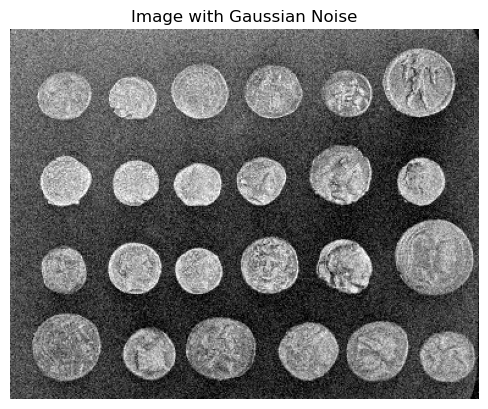

In [17]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 20  # standard deviation
gauss_noisy = image.copy()

# Generate Gaussian noise
noise = np.random.normal(0, sigma, image.shape)

# Add noise to the image
gauss_noisy = image + noise

# Normalize values to prevent overflow (range 0-255)
gauss_noisy = np.clip(gauss_noisy, 0, 255)

# Visualize the image with Gaussian noise
plt.imshow(gauss_noisy, cmap="gray")
plt.title("Image with Gaussian Noise")
plt.axis("off")
plt.show()

## c) Define Local Operator
In this exercise you will have to finish the local_operator function (cf. CV-04 p. 14).

The function will receive an image (img), kernel size (kernel_size) and a function as parameters.

For each pixel in the image, it will select a window of surrounding pixels according to the kernel_size.

This window is then passed on to the function as an argument.
The function then stores the result in the same position of the resulting image.
Therefore, the function should look similar to this:
```python
# define the function
def f(data):
    """Function to be applied by the local operator. 
    This example just returns 0.0, i.e. a black image.
    
    Args:
        data (np.ndarray): The window of the image as array. 
            Has the same shape as kernel_size, passed to local_operator.
        
    Returns:
        result (float): The value for the pixel at the same position in the resulting image
    """
    return 0.0

# call the local_operator with the function
local_operator(
    image,
    kernel_size=(1,1), 
    function=f,
)
```

In [22]:
def local_operator(img, kernel_size, function):
    """Execute a local operation on an image.

    Args:
        img (np.ndarray): The image, provided as a two-dimensional array.
        kernel_size (tuple): Shape of the applied window.
        function (function): the function that is applied to the window
        
    Returns:
        result (np.ndarray): The new image after the local operator was applied. 
        
    """
    
    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kernel_size
    # and also the half kernel size
    mh, nh = (m//2, n//2)
    
    # Initialize the result matrix
    result = np.zeros((M,N), dtype=np.float64)

    # Compute the operation
    # YOUR CODE HERE
    raise NotImplementedError()
    return result

As an example, we provide you with an identity filter, which just returns the original image.

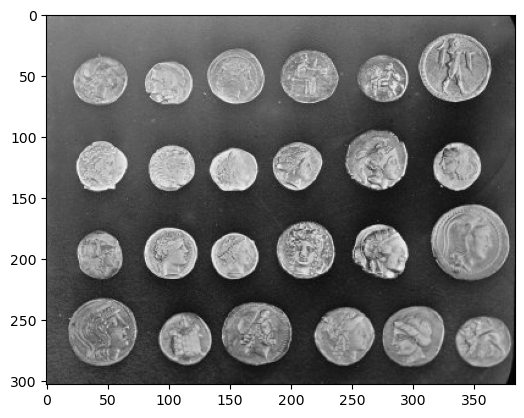

In [21]:
def identity_filter(image):
    return local_operator(
        image,
        kernel_size=(1,1), 
        function=lambda x: x[0][0],
    )
plt.imshow(identity_filter(image), cmap="gray")
plt.show()

### d) Create and apply the following filters:
 - Min Filter (cf. CV-04 slides 23-24)
 - Max Filter (cf. CV-04 slides 23-24)
 - Median Filter (cf. CV-04 slides 25-26)
 - KNN Filter (cf. CV-04 slide 29)
 - SNN Filter (cf. CV-04 slide 30)

Use a kernel_size of `(3, 3)` and for the KNN filter, set K$=4$

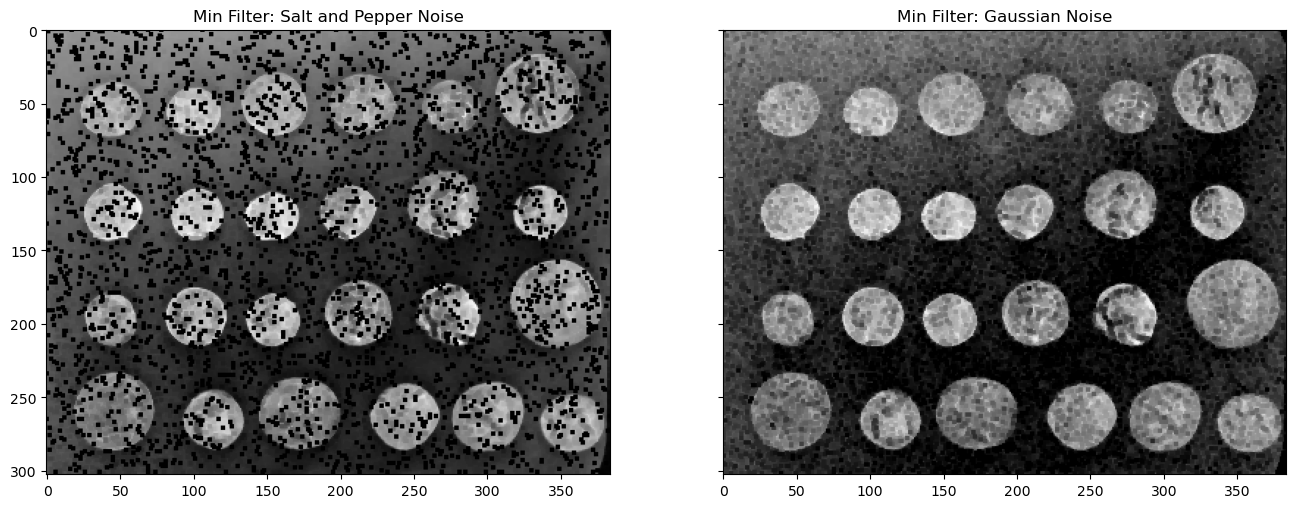

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import minimum_filter

def min_filter(image, kernel_size=(3, 3)):
    """Apply a min filter to an image.
    
    Args:
        image (np.ndarray): Input image.
        kernel_size (tuple): Size of the filter kernel.
    
    Returns:
        np.ndarray: Filtered image.
    """
    return minimum_filter(image, size=kernel_size)

# Apply the filter to the noisy images
min_filtered_sp = min_filter(sp_noisy, kernel_size=(3, 3))
min_filtered_gauss = min_filter(gauss_noisy, kernel_size=(3, 3))

# Plot the results
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(min_filtered_sp, cmap="gray")
ax[0].set_title("Min Filter: Salt and Pepper Noise")

ax[1].imshow(min_filtered_gauss, cmap="gray")
ax[1].set_title("Min Filter: Gaussian Noise")

plt.show()

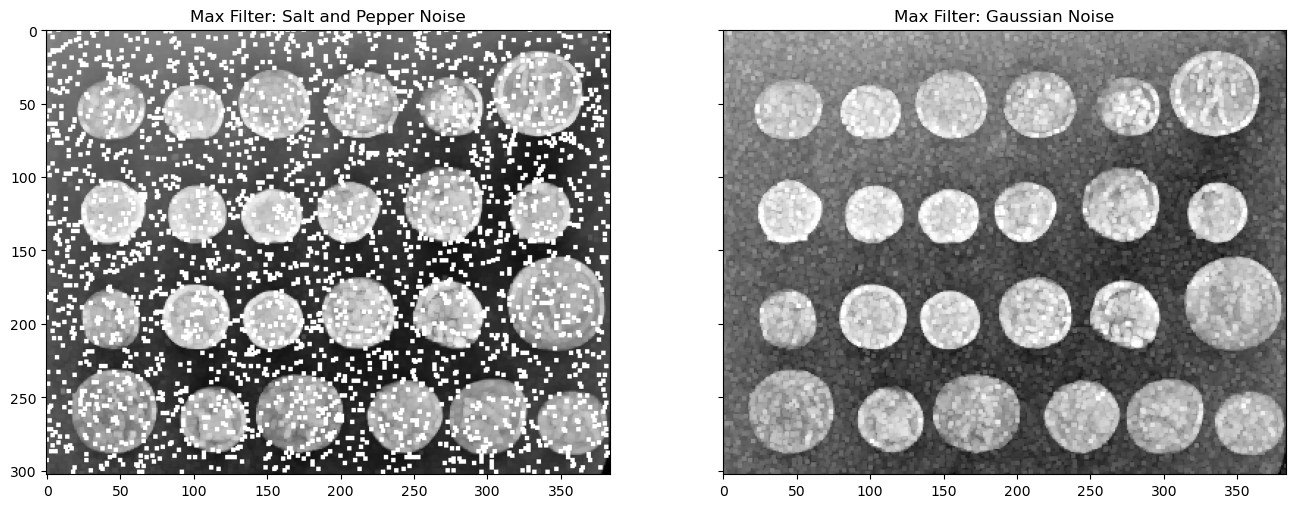

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter

def max_filter(image, kernel_size=(3, 3)):
    """Apply a max filter to an image.
    
    Args:
        image (np.ndarray): Input image.
        kernel_size (tuple): Size of the filter kernel.
    
    Returns:
        np.ndarray: Filtered image.
    """
    return maximum_filter(image, size=kernel_size)

# Apply the max filter to the noisy images
max_filtered_sp = max_filter(sp_noisy, kernel_size=(3, 3))
max_filtered_gauss = max_filter(gauss_noisy, kernel_size=(3, 3))

# Plot the results
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(max_filtered_sp, cmap="gray")
ax[0].set_title("Max Filter: Salt and Pepper Noise")

ax[1].imshow(max_filtered_gauss, cmap="gray")
ax[1].set_title("Max Filter: Gaussian Noise")

plt.show()

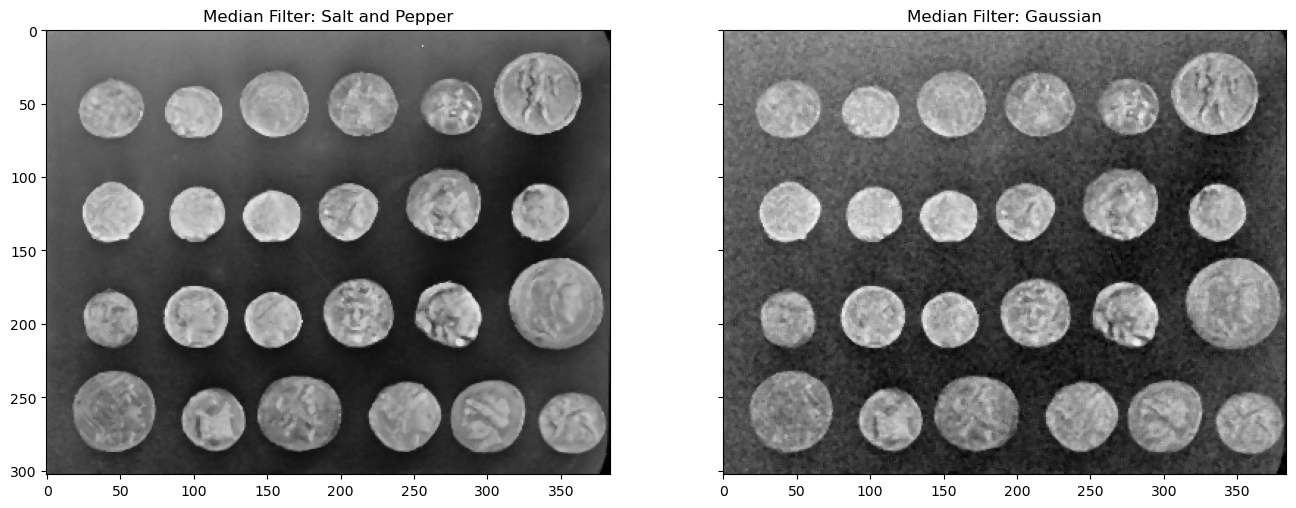

In [24]:
from scipy.ndimage import median_filter

# Apply the median filter to the noisy images
median_filtered_sp = median_filter(sp_noisy, size=(3, 3))
median_filtered_gauss = median_filter(gauss_noisy, size=(3, 3))

# Plot the results
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(median_filtered_sp, cmap="gray")
ax[0].set_title("Median Filter: Salt and Pepper")

ax[1].imshow(median_filtered_gauss, cmap="gray")
ax[1].set_title("Median Filter: Gaussian")

plt.show()

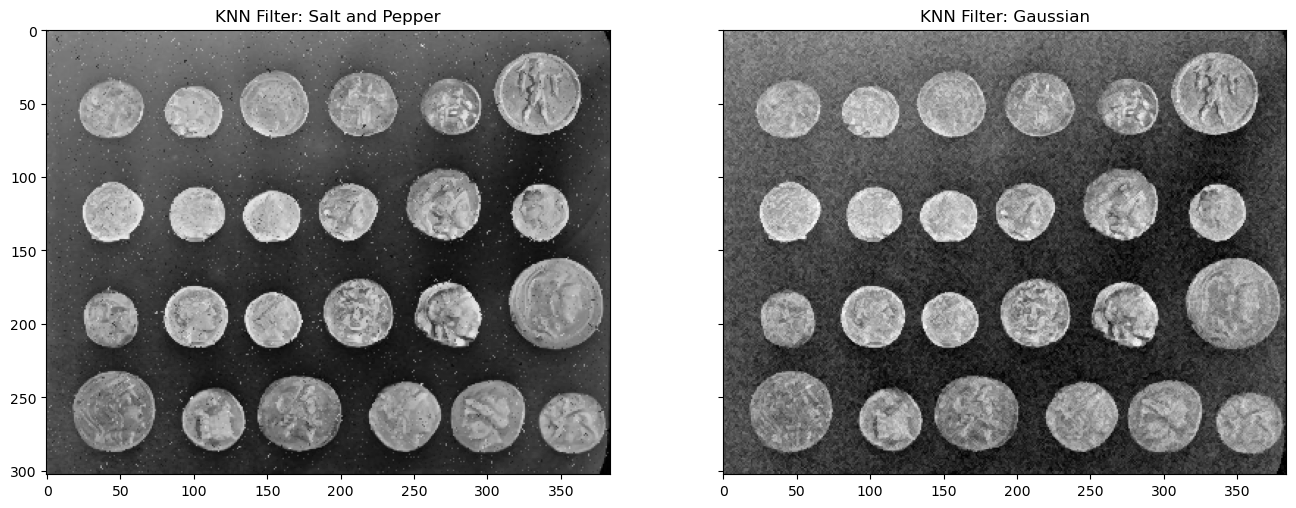

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def knn_filter(image, kernel_size=(3, 3), k=5):
    """Apply K-Nearest Neighbor (KNN) Filter to an image.
    
    Args:
        image (np.ndarray): Input image.
        kernel_size (tuple): Size of the local neighborhood (must be odd).
        k (int): Number of nearest neighbors to consider.
    
    Returns:
        np.ndarray: Filtered image.
    """
    # Image dimensions
    M, N = image.shape
    m, n = kernel_size
    mh, nh = m // 2, n // 2
    
    # Pad the image to handle borders
    padded_image = np.pad(image, ((mh, mh), (nh, nh)), mode='reflect')
    filtered_image = np.zeros_like(image, dtype=np.float64)
    
    # Iterate over each pixel in the image
    for i in range(M):
        for j in range(N):
            # Extract the local neighborhood
            local_window = padded_image[i:i + m, j:j + n]
            center_pixel = padded_image[i + mh, j + nh]
            
            # Compute distances from the center pixel
            distances = np.abs(local_window.flatten() - center_pixel)
            
            # Find the K nearest neighbors
            knn_indices = np.argsort(distances)[:k]
            knn_values = local_window.flatten()[knn_indices]
            
            # Compute the average of the K nearest neighbors
            filtered_image[i, j] = np.mean(knn_values)
    
    return filtered_image

# Apply the KNN filter
knn_filtered_sp = knn_filter(sp_noisy, kernel_size=(3, 3), k=5)
knn_filtered_gauss = knn_filter(gauss_noisy, kernel_size=(3, 3), k=5)

# Plot the results
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(knn_filtered_sp, cmap="gray")
ax[0].set_title("KNN Filter: Salt and Pepper")

ax[1].imshow(knn_filtered_gauss, cmap="gray")
ax[1].set_title("KNN Filter: Gaussian")

plt.show()

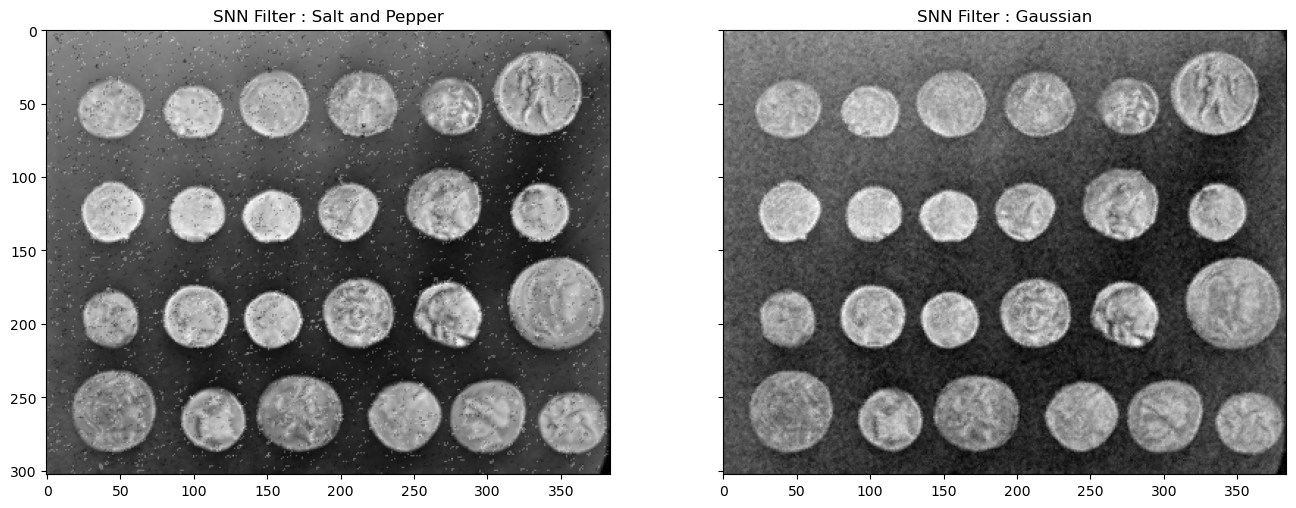

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def snn_filter(image, kernel_size=(3, 3), k=4):
    """Apply Symmetric Nearest Neighbor (SNN) Filter to an image.
    
    Args:
        image (np.ndarray): Input image.
        kernel_size (tuple): Size of the local neighborhood (must be odd).
        k (int): Number of symmetric nearest neighbors to consider.
    
    Returns:
        np.ndarray: Filtered image.
    """
    # Image dimensions
    M, N = image.shape
    m, n = kernel_size
    mh, nh = m // 2, n // 2
    
    # Pad the image to handle borders
    padded_image = np.pad(image, ((mh, mh), (nh, nh)), mode='reflect')
    filtered_image = np.zeros_like(image, dtype=np.float64)
    
    # Iterate over each pixel in the image
    for i in range(M):
        for j in range(N):
            # Extract the local neighborhood
            local_window = padded_image[i:i + m, j:j + n]
            center_pixel = local_window[mh, nh]
            
            # Define symmetric pairs
            symmetric_pairs = [
                (local_window[mh - 1, nh - 1], local_window[mh + 1, nh + 1]),  # Top-left, bottom-right
                (local_window[mh - 1, nh + 1], local_window[mh + 1, nh - 1]),  # Top-right, bottom-left
                (local_window[mh - 1, nh], local_window[mh + 1, nh]),          # Top-center, bottom-center
                (local_window[mh, nh - 1], local_window[mh, nh + 1])           # Center-left, center-right
            ]
            
            # Compute distances from the center pixel
            sym_distances = [
                (abs(a - center_pixel), abs(b - center_pixel))
                for a, b in symmetric_pairs
            ]
            
            # Flatten the distances and values
            flat_distances = [(d1, a) for d1, (a, _) in zip(sym_distances, symmetric_pairs)] + \
                             [(d2, b) for d2, (_, b) in zip(sym_distances, symmetric_pairs)]
            
            # Sort by distance and take the K nearest
            flat_distances.sort(key=lambda x: x[0])
            nearest_values = [val for _, val in flat_distances[:k]]
            
            # Compute the new pixel value as the mean of K nearest values
            filtered_image[i, j] = np.mean(nearest_values)
    
    return filtered_image

# Apply the SNN filter with kernel_size=(3, 3) and K=4
snn_filtered_sp = snn_filter(sp_noisy, kernel_size=(3, 3), k=4)
snn_filtered_gauss = snn_filter(gauss_noisy, kernel_size=(3, 3), k=4)

# Plot the results
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(snn_filtered_sp, cmap="gray")
ax[0].set_title("SNN Filter : Salt and Pepper")

ax[1].imshow(snn_filtered_gauss, cmap="gray")
ax[1].set_title("SNN Filter : Gaussian")

plt.show()

## Assignment 2: Morphological operators (3 points)

This exercise will elaborate on the basic morphological operators of *erosion* and *dilation* (cf. CV-04 slides 35-51).

### a) Morphological operators

Explain in your own words the idea of morphological operators. Describe potential applications.

YOUR ANSWER HERE

Search for a pre-defined pattern in the image using a structuring element. The operations of erosion or dilation can be used individually or in a combination and they help in smoothing, removing noise or filling gap.

### b) Erosion and dilation

Describe in your own words the morphological operations *erosion* and *dilation*. Compare them with 2D convolution, name commonalities and differences.

YOUR ANSWER HERE

Erosion - Sets a pixel to 0 when the entire pattern is matched and makes the image thinner. Dilation - Sets a pixel to 1 when a part of the pattern is matched and makes the image thicker.

Similarity to convulation - the structuring element moves across the image like a filter kernal and updates a single pixel(based on anchor point), the value is based on the neighbors Differences - changes shape of the objects in image vs enhances image features

### c) Structuring element

Erosion of an image $g$ with a structuring element $S$ results in an image $g'$ that is a "subset" of that image (in the sense that all pixels set in $g$ are also set in $g'$) as long as the anchor point is contained in $S$, i.e. covered by a **1** in the structuring element. Provide an example in which the erosion $g'=g\ominus S$ lies outside (or partially outside) of $g$.

YOUR ANSWER HERE

## Assignment 3: Properties of morphological operators (5 points)

This exercise will elaborate on the basic morphological operators of *erosion* and *dilation* (cf. CV-04 slides 35-51).

### a) Duality

Proof that *erosion* and *dilation* are *dual* operators, i.e.

$$ g^{\ast}\oplus S = (g\ominus S)^{\ast}\qquad\text{and}\qquad
g^{\ast}\ominus S = (g\oplus S)^{\ast}$$

here $g^{\ast}$ denotes the inverted binary image, i.e. $g^{\ast}(x,y) = 1 - g(x,y) = \neg g(x,y)$, i.e. 1-pixel become 0 and 0-pixel become 1.

YOUR ANSWER HERE

Erosion and dilation are **dual** to each other, meaning that erosion of an image $g$ with a structuring element $S$ corresponds to the dilation of the complement of the image, and vice versa. This relationship is expressed mathematically as:

### Mathematical Expressions for Erosion and Dilation:

- **Erosion** of an image $g$ with a structuring element $S$ is defined as:
  
  $$
  g' = g \ominus S
  $$

- **Dilation** of an image $g$ with a structuring element $S$ is defined as:
  
  $$
  g'' = g \oplus S
  $$

The duality is evident in the following identities:

- **Erosion** of an image $g$ with a structuring element $S$ is equivalent to the **dilation** of the complement of $g$ (denoted $\neg g$) with the same structuring element $S$:

  $$
  g' = \neg g \oplus S
  $$

- **Dilation** of an image $g$ with a structuring element $S$ is equivalent to the **erosion** of the complement of $g$ (denoted $\neg g$) with the same structuring element $S$:

  $$
  g'' = \neg g \ominus S
  $$


### The Inverses:

- If we perform erosion on an image $g$ (with $g \ominus S$), we get the eroded image $g'$
- If we take the **complement** of the image $\neg g$ (where all $1$ become $0$ and all $0$ become $1$) and then perform dilation (with $\neg g \oplus S$), we will get the same result as the erosion of $g$


### b) Superposition

As *erosion* and *dilation* have been introduced for binary images, the notion of *linearity* is not really appropriate here. However, some weaker version, called *superposition* can be defined: instead of forming a linear combination, one takes the logical disjunction:

$$(g_1\lor g_2)(x,y) := g_1(x,y)\lor g_2(x,y)$$

Check for both operations if *erosion* and *dilation* are "compatible" with superposition, i.e. if first *eroding* (or *dilating*) two images and superposing the result is the same as first superposing the images and then *eroding* (or *dilating*) the result.

YOUR ANSWER HERE

Erosion is NOT compatible with superposition.
Dilation is compatible with superposition.


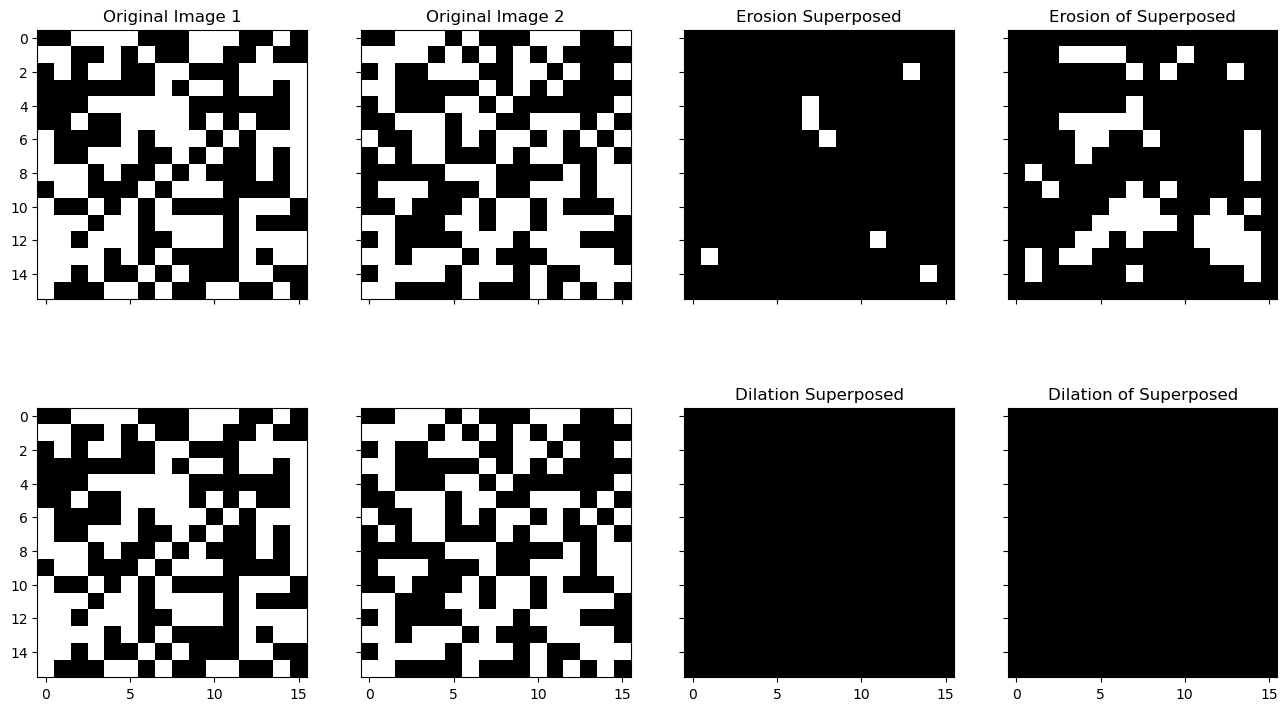

In [31]:
from scipy.ndimage import binary_erosion, binary_dilation

def check_similarity(g1, g2, S, mode):
    # Superposition of g1 and g2
    sp = g1 | g2
    
    # Erosion or Dilation of g1 and g2 based on mode
    if mode == 'Erosion':
        g1_op = binary_erosion(g1, structure=S).astype(int)
        g2_op = binary_erosion(g2, structure=S).astype(int)
    elif mode == 'Dilation':
        g1_op = binary_dilation(g1, structure=S).astype(int)
        g2_op = binary_dilation(g2, structure=S).astype(int)
    else:
        raise ValueError("Mode must be either 'Erosion' or 'Dilation'")
    
    # Superposition of the operated images (erosion or dilation)
    sp_op = g1_op | g2_op
    
    # Erosion or Dilation of the superposition of g1 and g2
    if mode == 'Erosion':
        sp_op_check = binary_erosion(sp, structure=S).astype(int)
    elif mode == 'Dilation':
        sp_op_check = binary_dilation(sp, structure=S).astype(int)
    
    # Check if both results are equal
    res = (sp_op == sp_op_check).all()
    
    if res:
        print(f'{mode} is compatible with superposition.')
    else:
        print(f'{mode} is NOT compatible with superposition.')



# Define the binary images
g1 = np.array([[1, 1, 0, 0, 0],
               [1, 1, 0, 0, 0],
               [0, 0, 1, 1, 0],
               [0, 0, 1, 1, 0],
               [0, 0, 0, 0, 0]])

g2 = np.array([[0, 0, 1, 1, 0],
               [0, 0, 1, 1, 0],
               [0, 1, 1, 1, 0],
               [0, 1, 1, 1, 0],
               [0, 0, 0, 0, 0]])

# Define the structuring element
S = np.ones((3, 3))  # A 3x3 square structuring element


check_similarity(g1, g2, S, 'Erosion')
check_similarity(g1, g2, S, 'Dilation')


# Visualized
from scipy import ndimage
test_image_1 = np.random.randint(2, size=(16,16)).astype(bool)
test_image_2 = np.random.randint(2, size=(16,16)).astype(bool)

e_1 = ndimage.binary_erosion(test_image_1).astype(bool)
e_2 = ndimage.binary_erosion(test_image_2).astype(bool)

# Perform dilation on individual images
d_1 = ndimage.binary_dilation(test_image_1).astype(bool)
d_2 = ndimage.binary_dilation(test_image_2).astype(bool)

# Superpose the eroded and dilated results
erosion_superposed = e_1 | e_2
dilation_superposed = d_1 | d_2

# Superpose the original images
superposed_image = test_image_1 | test_image_2

# Erode and dilate the superposed image
erosion_of_superposed = ndimage.binary_erosion(superposed_image).astype(bool)
dilation_of_superposed = ndimage.binary_dilation(superposed_image).astype(bool)

# Check compatibility
erosion_compatible = np.array_equal(erosion_superposed, erosion_of_superposed)
dilation_compatible = np.array_equal(dilation_superposed, dilation_of_superposed)

# Plot the results
fig, ax = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(16, 9))
ax[0, 0].imshow(test_image_1, cmap="gray")
ax[0, 0].set_title("Original Image 1")
ax[0, 1].imshow(test_image_2, cmap="gray")
ax[0, 1].set_title("Original Image 2")
ax[0, 2].imshow(erosion_superposed, cmap="gray")
ax[0, 2].set_title("Erosion Superposed")
ax[0, 3].imshow(erosion_of_superposed, cmap="gray")
ax[0, 3].set_title("Erosion of Superposed")

ax[1, 0].imshow(test_image_1, cmap="gray")
ax[1, 1].imshow(test_image_2, cmap="gray")
ax[1, 2].imshow(dilation_superposed, cmap="gray")
ax[1, 2].set_title("Dilation Superposed")
ax[1, 3].imshow(dilation_of_superposed, cmap="gray")
ax[1, 3].set_title("Dilation of Superposed")

plt.show()


### c) Chaining

Show that *dilation* and *erosion* have the following properties: given two structering elements $S_1$ and $S_2$, it holds

\begin{align}
  (g\oplus S_1)\oplus S_2 & & = & g\oplus (S_1\oplus S_2) && = (g\oplus S_2)\oplus S_1 \\
  (g\ominus S_1)\ominus S_2 & & = & g\ominus (S_1\ominus S_2) && = (g\ominus S_2)\ominus S_1 \\  
\end{align}

What are the practical consequences?

YOUR ANSWER HERE

Remark: for the argument to work, we have to assume, that images and structuring elements are large enough and zero-padded. Otherwise it is possible to create counter examples like the following:

In [32]:
import numpy as np
from scipy.ndimage import binary_dilation
a =          np.array([[0,0,0,0,0],
                      [0,0,0,0,0],
                      [0,0,1,0,0],
                      [0,0,0,0,0],
                      [0,0,0,0,0]])
b2 =          np.array([[0,0,0,0,0], #for this one the rule holds 
                      [0,1,1,1,0],
                      [0,1,1,1,0],
                      [0,1,1,1,0],
                      [0,0,0,0,0]])
b =          np.array([[1,1,1], #for this one it dosen´t
                      [1,1,1],
                      [1,1,1],])
c = b
c2 = b2
d = np.zeros(c.shape, int)
out1 = np.zeros(a.shape, int)
out2 = np.zeros(a.shape, int)
out1 = binary_dilation(binary_dilation(a,b),c)
out2 = binary_dilation(a,binary_dilation(b,c))

print(out1)
print(out2)

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
[[False False False False False]
 [False  True  True  True False]
 [False  True  True  True False]
 [False  True  True  True False]
 [False False False False False]]


### 1. Dilation Property: Chaining

#### Property:
$$
(g \oplus S_1) \oplus S_2 = g \oplus (S_1 \oplus S_2) = (g \oplus S_2) \oplus S_1
$$

#### Explanation:
The dilation operation is **associative**, meaning that the order in which we apply multiple dilation operations does not matter.

- **Left-hand side:**
  $ (g \oplus S_1) \oplus S_2 $ means we first dilate the image $g$ by $S_1$, and then dilate the result by $S_2$
  
- **Right-hand side:**
  $ g \oplus (S_1 \oplus S_2) $ means we first combine the structuring elements $S_1$ and $S_2$ (by dilating them together), and then dilate the image $g$ by this combined structuring element.
  
- The associativity of dilation ensures that these two operations yield the same result. Additionally, dilation is commutative, so we can also swap $S_1$ and $S_2$, which gives the third form: $$ (g \oplus S_2) \oplus S_1 $$

This property tells us that the order in which we apply dilation with different structuring elements doesn't change the outcome.

### 2. Erosion Property: Chaining

#### Property:
$$
(g \ominus S_1) \ominus S_2 = g \ominus (S_1 \ominus S_2) = (g \ominus S_2) \ominus S_1
$$

#### Explanation:
The erosion operation is **also associative**, meaning that the order in which we apply multiple erosion operations does not matter either.

- **Left-hand side:**
  $ (g \ominus S_1) \ominus S_2 $ means we first erode the image $g$ by $S_1$, and then erode the result by $S_2$.
  
- **Right-hand side:**
  $ g \ominus (S_1 \ominus S_2) $ means we first combine the structuring elements $S_1$ and $S_2$ (by eroding them together), and then erode the image $g$ by this combined structuring element.
  
- Again, the associativity of erosion ensures that these two operations yield the same result. And, like dilation, erosion is commutative, so we can swap $S_1$ and $S_2$, which gives the third form: $$ (g \ominus S_2) \ominus S_1 $$

This property tells us that the order in which we apply erosion with different structuring elements doesn't change the outcome.

### Practical Consequences

- **Simplifies computation**: Since dilation and erosion are associative and commutative, we can rearrange the order of operations or group the structuring elements in different ways without affecting the final result. This can simplify algorithmic implementation and optimization
  
- **Flexible structuring element application**: We can combine multiple structuring elements into a single operation, or apply them in any order, and the result will remain the same. This allows for more flexible and efficient design of morphological algorithms
  
- **Parallelism in image processing**: Since the order of operations doesn't matter, it opens up the possibility of parallel processing in certain cases, where different structuring elements can be applied to different regions of the image independently



## Assignment 4: Custom Structuring Element (5 points)

Landsat 7 was a satelite mission for acquisition of satellite imagery of Earth. Unfortunately the Scan Line Corrector failed, resulting in black stripes on the aquired images. More information: [https://landsat.gsfc.nasa.gov/satellites/landsat-7](https://landsat.gsfc.nasa.gov/satellites/landsat-7)

### a) A first fix

A rather crude fix is to apply a custom structuring element for dilation and erosion (see CV-04, 66ff). Complement the code below (in part (b)) in the following way:
* Rotate the image such that the gaps are horizontal.
* Dilate the rotated image with a vertical structuring element. I.e. take the maximum of an area of size $7 \times1$ and assign it to the center pixel. Repeat for all pixels.
* Erode the dilated image.
* Rotate the result back.

Remark: this exercise applies morphological operator to color images. This extends the idea of generalizing morphological operators to gray value images.  

### b) Improving the solution
You may get better results by thresholding and applying the morphological operations only to pixels below a threshold, i.e. gap pixels. Compliment your solution from a). 

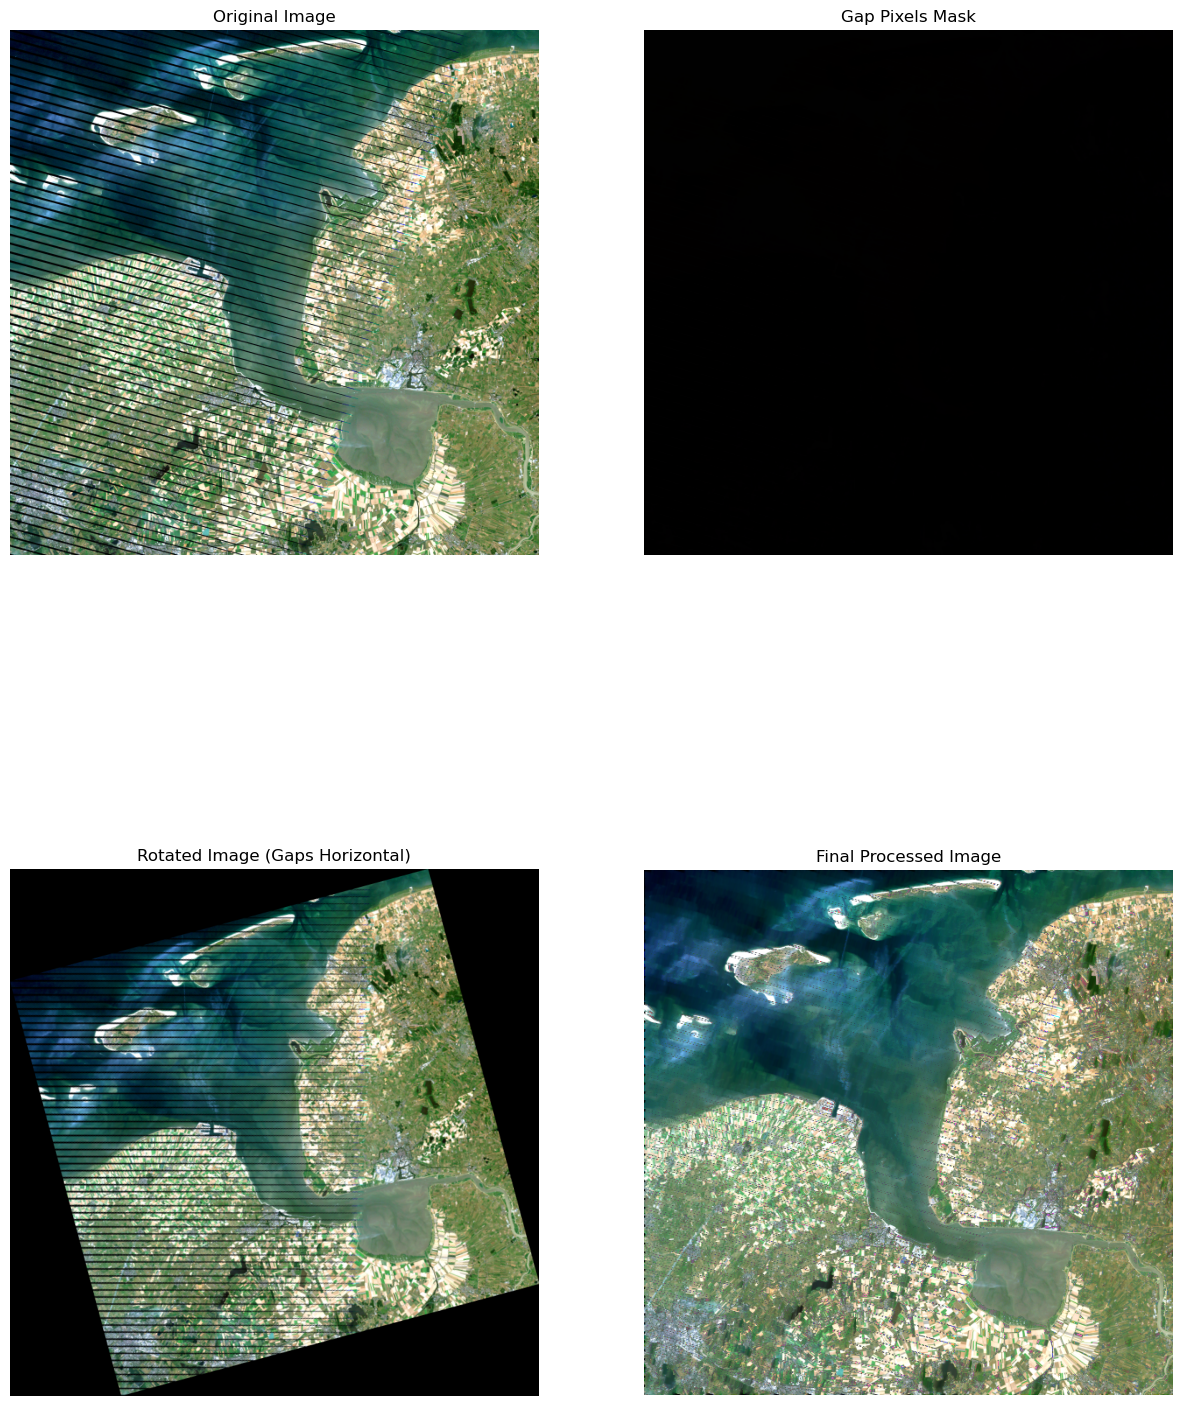

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import grey_dilation, grey_erosion
from skimage.transform import rotate
from imageio.v3 import imread

# Parameters
angle = 15  # Angle to rotate the image for horizontal gaps
thresh = 0.3  # Threshold for identifying stripes
struct_elem_size = (7, 1)  # Size of the structuring element for dilation and erosion

# Load and normalize the image
img = imread("/Users/antonrusakov/Library/UniOsna/ComputerVision/Sheet03/landsat_stack2.png")

# Reorder to true RGB for Landsat images if necessary
if img.shape[-1] == 3:  # Check if the image has three channels
    img = np.stack([img[..., 2], img[..., 1], img[..., 0]], axis=-1)  # Rearrange channels

# Normalize the image to [0, 1]
img = (img - np.min(img)) / np.ptp(img)

# Step 1: Thresholding to identify stripes
gap_mask = np.where(img < thresh, 1, 0)  # Binary mask: 1 for stripes, 0 for others

# Step 2: Rotate the image to make gaps horizontal
rotated_img = np.clip(rotate(img, angle, resize=True), 0, 1)

# Step 3: Apply dilation and erosion to the rotated image
# Process each channel separately
dilated_img = np.stack([
    grey_dilation(rotated_img[..., channel], size=struct_elem_size) for channel in range(rotated_img.shape[-1])
], axis=-1)

eroded_img = np.stack([
    grey_erosion(dilated_img[..., channel], size=struct_elem_size) for channel in range(dilated_img.shape[-1])
], axis=-1)

# Step 4: Rotate the processed image back to the original orientation
processed_gap_img = np.clip(rotate(eroded_img, -angle, resize=True), 0, 1)

# Step 5: Crop the processed image to match the original size
processed_gap_img = processed_gap_img[
    (processed_gap_img.shape[0] - img.shape[0]) // 2 : (processed_gap_img.shape[0] + img.shape[0]) // 2,
    (processed_gap_img.shape[1] - img.shape[1]) // 2 : (processed_gap_img.shape[1] + img.shape[1]) // 2,
    :
]

# Step 6: Combine the processed stripes and original image
result_img = img * (1 - gap_mask) + processed_gap_img * gap_mask

# Visualization
plt.figure(figsize=(15, 20))
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gap_mask, cmap="gray")
plt.title("Gap Pixels Mask")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(rotated_img)
plt.title("Rotated Image (Gaps Horizontal)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(result_img)
plt.title("Final Processed Image")
plt.axis('off')

plt.show()

### c) Bonus
Can you think of (and implement) other ways to add the missing data? 


YOUR ANSWER HERE

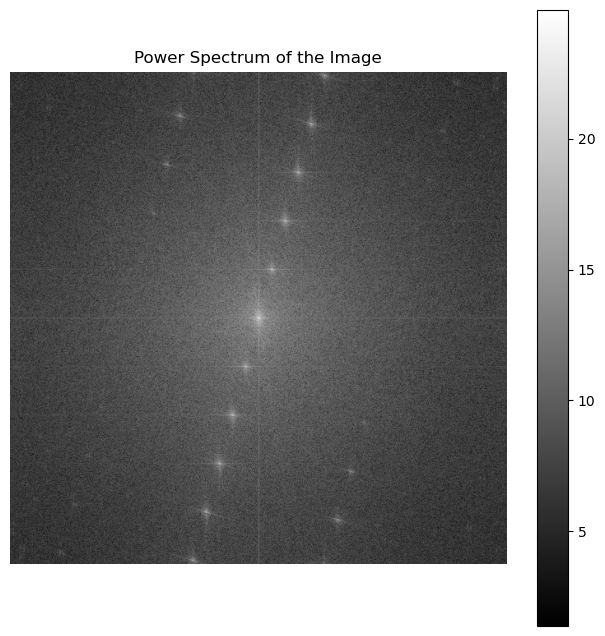

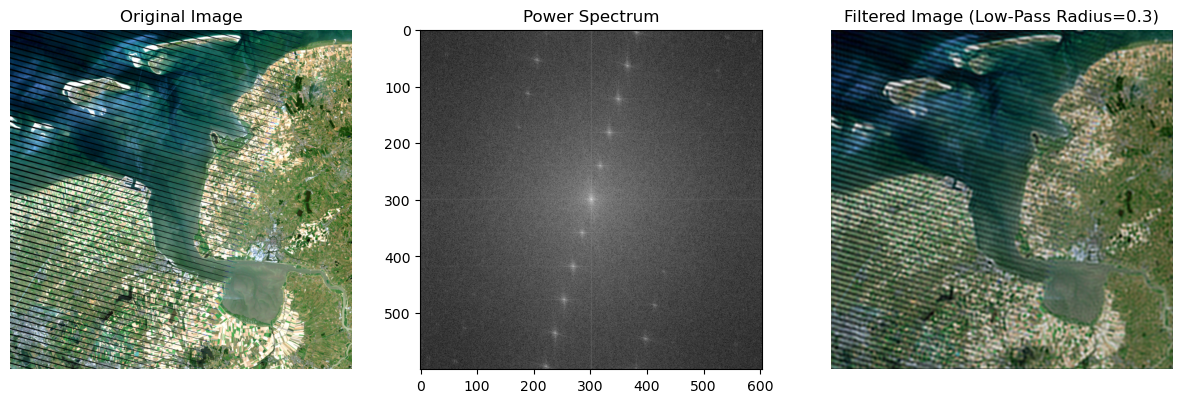

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from imageio.v3 import imread

# Load the image
img = imread("landsat_stack2.png")
# Reorder to true RGB, which is originally arranged inversely in Landsat 7
img = np.stack([img[..., 2], img[..., 1], img[..., 0]], axis=-1)
img = (img - np.min(img)) / np.ptp(img)  # Normalize the image to [0, 1]

# Compute the 2D FFT of the image
img_fft = fft2(img, axes=(0, 1))  # FFT only on the spatial dimensions (height and width)
img_fft_shifted = fftshift(img_fft)  # Shift zero-frequency component to the center

# Compute the power spectrum (magnitude of the FFT)
power_spectrum = np.abs(img_fft_shifted) ** 2

# Display the power spectrum (log scale for better visibility)
plt.figure(figsize=(8, 8))
plt.imshow(np.log(power_spectrum.sum(axis=-1) + 1), cmap='gray')  # Sum over all channels for RGB
plt.colorbar()
plt.title("Power Spectrum of the Image")
plt.axis('off')
plt.show()

# Create the mask for filtering
rows, cols = img.shape[:2]
crow, ccol = rows // 2, cols // 2  # Center of the frequency domain

radius = 0.3  # Fractional radius for low-pass filtering
Y, X = np.ogrid[:rows, :cols]
distance = np.sqrt((X - ccol)**2 + (Y - crow)**2)
mask = np.zeros((rows, cols))
mask[distance <= radius * min(rows, cols) / 2] = 1  # Create a circular low-pass mask

# Apply the mask to the frequency domain
img_fft_shifted_filtered = img_fft_shifted * mask[..., None]  # Apply the mask to all channels

# Perform the inverse FFT to reconstruct the image
img_filtered = np.abs(ifft2(ifftshift(img_fft_shifted_filtered), axes=(0, 1)))

# Normalize the result image to the range [0, 1] for visualization
result_normalized = np.clip((img_filtered - np.min(img_filtered)) / np.ptp(img_filtered), 0, 1)

# Visualization
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(power_spectrum.sum(axis=-1) + 1), cmap='gray')
plt.title("Power Spectrum")

plt.subplot(1, 3, 3)
plt.imshow(result_normalized)
plt.title(f"Filtered Image (Low-Pass Radius={radius})")
plt.axis('off')
plt.show()